In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [72]:
df1=pd.read_csv('CRIMEgamma_plots.csv')
df=pd.read_csv('TA1Agamma_plots.csv')
df2=pd.read_csv('TERRORcomp2/gammacsvs/TERROR2012_2016gamma_plots.csv')
df21=pd.read_csv('TERRORcomp2/gammacsvs/TERROR2011_2015gamma_plots.csv')
df22=pd.read_csv('TERRORcomp2/gammacsvs/TERROR2010_2014gamma_plots.csv')


In [73]:
from scipy.optimize import curve_fit
from scipy import stats

def zplot(df,var='gamma',gmin=-100000000,gmax=1000000,u=0,ax=None,col=None,R=12):
    
    df=df[df[var].between(gmin,gmax)]
    
    s=pd.cut(df[var],R)
    df['code'] = s.cat.codes
    zf=pd.DataFrame(df.code.value_counts())
    zf=zf/zf.code.values[u]
    zf=zf.reset_index().drop('index',axis=1).sort_values('code')
    ax=zf.loc[:u,:].plot(style='-o',color=col,loglog=True,ax=ax)
    ar=zf.loc[:u,:].reset_index().values
    #popt, pcov = curve_fit(f, np.log(ar[:,0]), np.log(ar[:,1])) # your data x, y to fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ar[:,0]), np.log(ar[:,1]))
    print(slope,p_value, std_err)
    return ax, slope, r_value

In [74]:
df.head()

,variable,srcmean_gamma,srcmed_gamma,tgtmean_gamma,tgtmed_gamma,numSrc,numTgt
0,52.5#53.5#52.5#53.5#meetingPairs,0.026623,0.018818,0.026303,0.018804,672,5735
1,92.5#93.5#92.5#93.5#myFriends,0.061721,0.040288,0.027942,0.020671,992,2035
2,33.5#34.5#33.5#34.5#meetingPairs,0.022425,0.014174,0.039858,0.020716,1015,5580
3,66.5#67.5#66.5#67.5#popFrac,0.037348,0.019487,0.050419,0.024452,908,5681
4,64.5#65.5#64.5#65.5#myFriends,0.388672,0.380931,0.030470,0.022362,615,543


(-0.7496331361192273, 4.024159594810059e-07, 0.12391281528484122)
(-1.6794772315531272, 2.3468089978360093e-18, 0.1018676838614456)
(-1.0847570656164232, 5.99176577926959e-27, 0.03880354038419128)
(-1.1968427954102192, 5.385164603814187e-25, 0.04441219769572086)


/home/ishanu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(-1.1900301782892084, 4.65565608306974e-22, 0.04947580386512426)


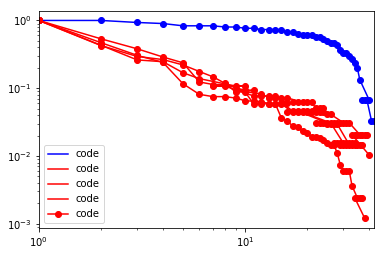

In [76]:
R=45
U=1
gmin=50
gmax=500000
[ax, slope, r_value]=zplot(df,var='numTgt',R=R,u=U,gmin=gmin,gmax=gmax,col='b')
#[ax, slope, r_value]=zplot(df,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='b')
#[ax, slope, r_value]=zplot(df1,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df1,var='numTgt',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
#[ax, slope, r_value]=zplot(df2,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df2,var='numTgt',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
#[ax, slope, r_value]=zplot(df21,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df21,var='numTgt',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df22,var='numTgt',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')


## df.columns

(-1.0868853710432493, 9.431043047037063e-12, 0.11162059033544289)
(-1.0586318809834008, 9.75928225432417e-10, 0.12561500481728777)
(-0.9598687726551376, 2.4881301389418323e-15, 0.0781081310393975)
(-0.6382541306392008, 2.2348106996671424e-09, 0.08322748795933564)
(-0.6045489038520396, 2.188645510259366e-08, 0.08644630982300489)


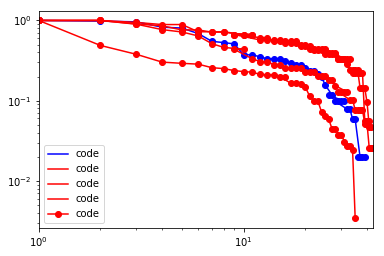

In [86]:
R=45
U=1
gmin=0.01
gmax=0.8
[ax, slope, r_value]=zplot(df,var='tgtmean_gamma',R=R,u=U,gmin=gmin,gmax=gmax,col='b')
#[ax, slope, r_value]=zplot(df,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='b')
#[ax, slope, r_value]=zplot(df1,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df1,var='tgtmean_gamma',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
#[ax, slope, r_value]=zplot(df2,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df2,var='tgtmean_gamma',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
#[ax, slope, r_value]=zplot(df21,var='numSrc',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df21,var='tgtmean_gamma',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
[ax, slope, r_value]=zplot(df22,var='tgtmean_gamma',R=R,u=U,gmin=gmin,gmax=gmax,ax=ax,col='r')
